In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
dataset_dir = "data_full" 

print("Loaded dataset from: " + dataset_dir)

Loaded dataset from: data_full


In [ ]:
import os

def preprocess_image(image_path, label, filename):
    try:
        image = tf.io.read_file(image_path)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (32, 32))
        image = image / 255.0  
        return image, label, filename
    except:
        print(image_path)
        os.remove(image_path)


In [17]:
img_height = 100 
img_width = 100
batch_size = 32

In [18]:
# Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1)
    

In [19]:
# Load the training data
train_ds = train_datagen.flow_from_directory(
    dataset_dir + "/train",
    seed=123, 
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

# Load the validation data
val_ds = train_datagen.flow_from_directory(
    dataset_dir + "/test",
    seed=123,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


Found 6094 images belonging to 2 classes.
Found 350 images belonging to 2 classes.


In [6]:
class_names_train = list(train_ds.class_indices.keys())
class_names_val = list(val_ds.class_indices.keys())


print("Training classes:", class_names_train)
print("Validation classes:", class_names_val)

Training classes: ['DRAWINGS', 'PAINTING']
Validation classes: ['DRAWINGS', 'PAINTING']


In [20]:
model = Sequential([
    tf.keras.layers.InputLayer(input_shape=(100, 100, 3)),
    #
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),
    #
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),
    #
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='sigmoid')
])

In [21]:
model.build()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 49, 49, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                      

In [26]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.h5', 
    save_best_only=True, 
    monitor='val_accuracy', 
    mode='max'
)

In [30]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    verbose=1,
    callbacks=[checkpoint]
)

model.save('version.h5')

Epoch 1/50
191/191 [==============================] - 76s 399ms/step - loss: 0.1945 - accuracy: 0.9288 - val_loss: 0.3389 - val_accuracy: 0.8629
Epoch 2/50
191/191 [==============================] - 76s 398ms/step - loss: 0.1799 - accuracy: 0.9339 - val_loss: 0.2758 - val_accuracy: 0.9114
Epoch 3/50
191/191 [==============================] - 76s 396ms/step - loss: 0.1735 - accuracy: 0.9363 - val_loss: 0.2376 - val_accuracy: 0.8971
Epoch 4/50
191/191 [==============================] - 76s 399ms/step - loss: 0.1654 - accuracy: 0.9372 - val_loss: 0.4970 - val_accuracy: 0.8171
Epoch 5/50
191/191 [==============================] - 76s 398ms/step - loss: 0.1549 - accuracy: 0.9386 - val_loss: 0.7027 - val_accuracy: 0.7000
Epoch 6/50
191/191 [==============================] - 76s 397ms/step - loss: 0.1638 - accuracy: 0.9376 - val_loss: 0.3300 - val_accuracy: 0.8800
Epoch 7/50
191/191 [==============================] - 76s 397ms/step - loss: 0.1644 - accuracy: 0.9358 - val_loss: 0.2804 - val_ac

KeyboardInterrupt: 

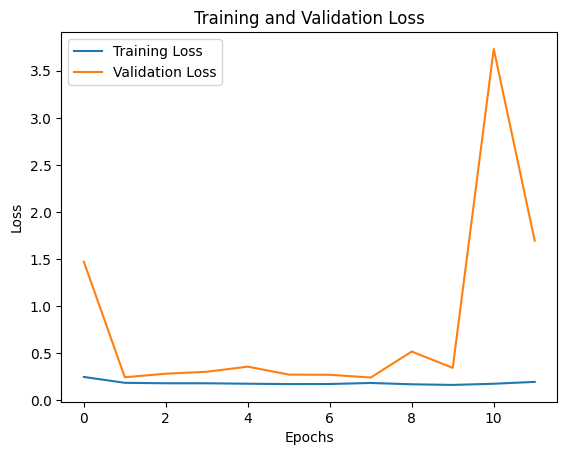

In [28]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

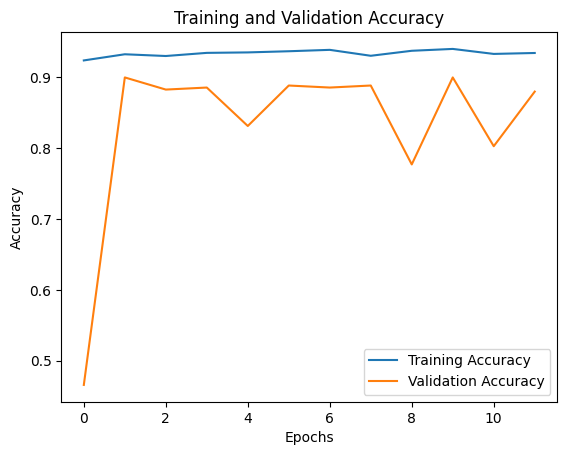

In [29]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()